In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
data= pd.read_csv("btc weekly close.csv")
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 06, 2013",14.2,13.4,14.4,13.4,228.80K,5.95%
1,"Jan 13, 2013",15.6,14.2,16.0,13.9,313.71K,9.69%
2,"Jan 20, 2013",17.9,15.6,19.2,15.4,485.49K,14.47%
3,"Jan 27, 2013",19.6,17.9,21.4,17.2,442.23K,9.79%
4,"Feb 03, 2013",23.6,19.6,24.0,19.4,318.71K,20.48%


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      537 non-null    object
 1   Price     537 non-null    object
 2   Open      537 non-null    object
 3   High      537 non-null    object
 4   Low       537 non-null    object
 5   Vol.      537 non-null    object
 6   Change %  537 non-null    object
dtypes: object(7)
memory usage: 29.5+ KB


In [4]:
# Convert the date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set the date as the index
#data.set_index('Date', inplace=True)

In [5]:
data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [6]:
# Function to convert string values with 'K', 'M', and 'B' suffixes to float
def str_to_float(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.rstrip('K')) * 1_000
        elif 'M' in value:
            return float(value.rstrip('M')) * 1_000_000
        elif 'B' in value:
            return float(value.rstrip('B')) * 1_000_000_000
    return float(value)

# Apply the conversion function to the 'Vol.' column and replace it
data['Vol'] = data['Vol.'].apply(str_to_float)
data.drop('Vol.', axis=1, inplace=True)  # Drop the original 'Vol.' column

In [7]:
# Convert the 'Change %' column to string, remove percentage signs, then convert it to float
data['Change %'] = data['Change %'].astype(str).str.rstrip('%').astype(float)

In [8]:
# Remove commas from numeric columns
numeric_columns = ['Price', 'Open', 'High', 'Low']
for column in numeric_columns:
    data[column] = data[column].str.replace(',', '').astype(float)
    data[column] = pd.to_numeric(data[column])

In [9]:
# Check if there are any missing values
if data.isnull().sum().sum() > 0:
    # Handle missing values. Here we fill the missing values with the mean, but this depends on your data
    data.fillna(df.mean(), inplace=True)

# Augmented Dickey-Fuller test (ADF test)

In [ ]:
"""""""""
# Apply Augmented Dickey-Fuller test on 'Price'
result = adfuller(data['Price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if result[1] > 0.05:
    print('p-value > 0.05. The data has a unit root and is non-stationary.')
else:
    print('p-value <= 0.05. The data is stationary.')


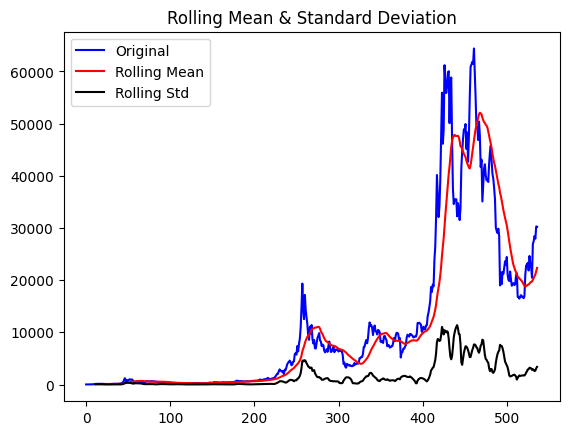

ADF Stastistic: -1.311273
p-value: 0.623999
The graph is non-stationary
Critical values:
	1%: -3.443 
	5%: -2.867 
	10%: -2.570 


In [10]:
def test_stationarity(x):
    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()
    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non-stationary")
            break
         else:
            print("The graph is stationary")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = data['Price']      
test_stationarity(ts)

# Log Transform

In [21]:
ts_log.shape

(537,)

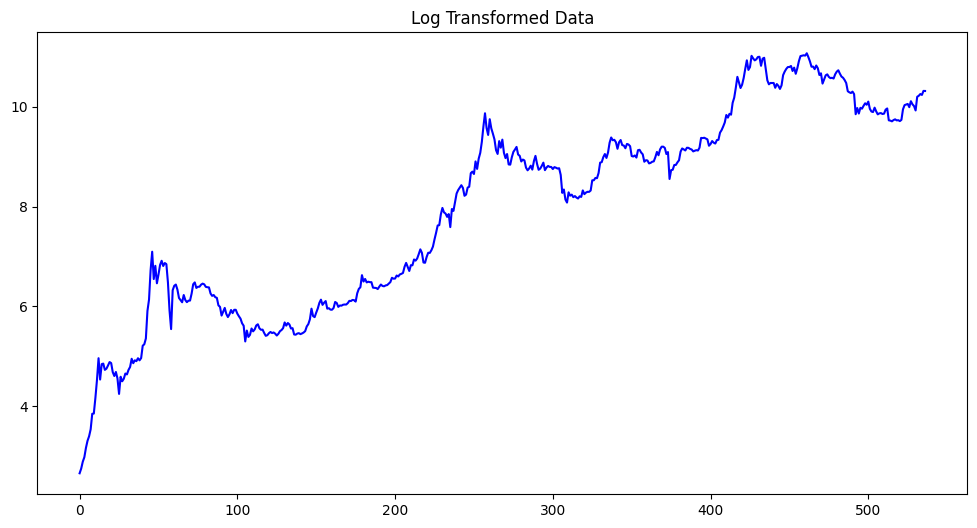

In [11]:
# Log transformation
ts_log = np.log(ts)

# Plot the log-transformed data
plt.figure(figsize=(12,6))
plt.plot(ts_log, color='blue')
plt.title('Log Transformed Data')
plt.show()

# Differencing

After differencing I got dimentionalty error. I droped nulls and now to avoid the error and match with time sequence I will drop first date.(dates_adjusted = dates[1:])

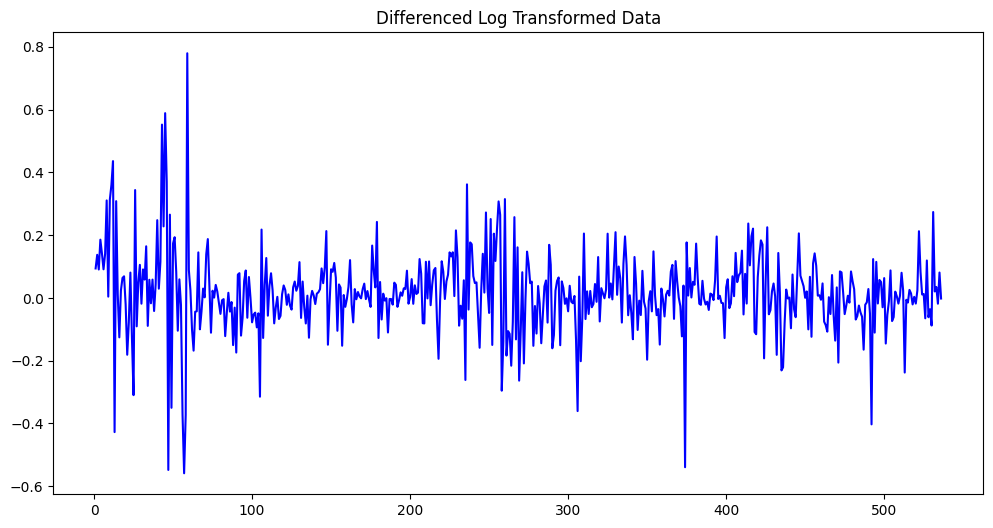

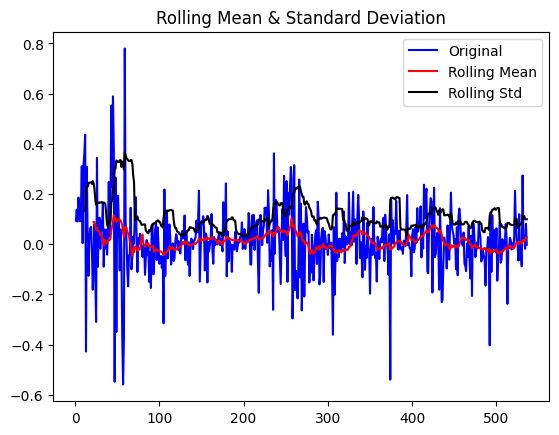

ADF Stastistic: -22.670396
p-value: 0.000000
The graph is stationary
Critical values:
	1%: -3.443 
	5%: -2.867 
	10%: -2.570 


In [12]:
# Differencing
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)

# Plot the differenced data
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff, color='blue')
plt.title('Differenced Log Transformed Data')
plt.show()

# Test stationarity again
test_stationarity(ts_log_diff)

# Train- Test Split

In [13]:
data['Date'].shape

(537,)

In [24]:
X.shape

(536,)

Training data: 509
Testing data: 27


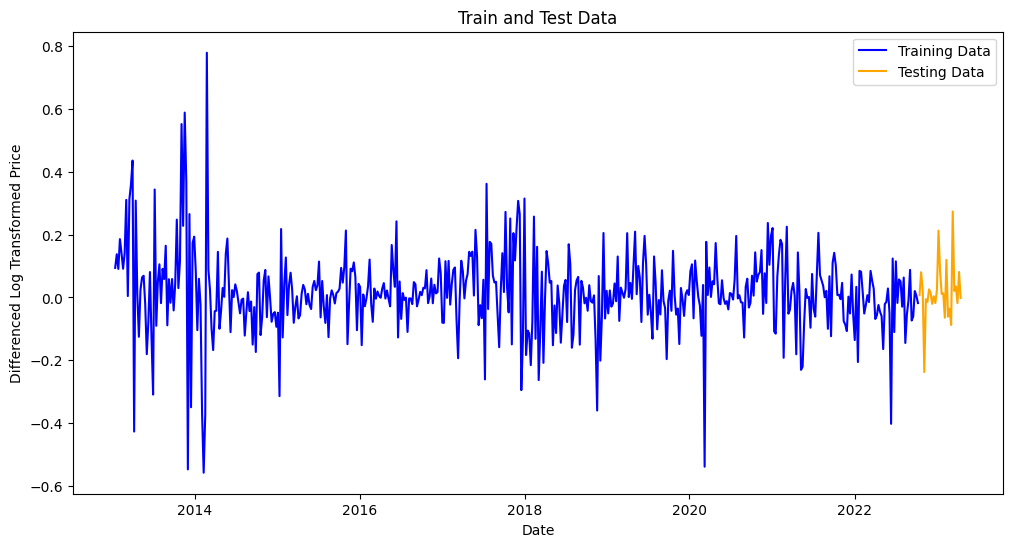

In [25]:
# Determine the split point
split_point = int(len(ts_log_diff) * 0.95)

# Split the data
y_train, y_test = ts_log_diff[0:split_point], ts_log_diff[split_point:]

X=data['Date']

# Drop the first date from the dates array to match time sequence after differencing
X = X[1:]

X_train, X_test = X[0:split_point], X[split_point:]

# Print the number of observations in the training and testing data
print('Training data: %d\nTesting data: %d' % (len(y_train), len(y_test)))


plt.figure(figsize=(12,6))

# Plot training data in blue
plt.plot(X_train, y_train, color='blue', label='Training Data')

# Plot testing data in orange
plt.plot(X_test, y_test, color='orange', label='Testing Data')

plt.title('Train and Test Data')
plt.xlabel('Date')
plt.ylabel('Differenced Log Transformed Price')
plt.legend()
plt.show()

# ARIMA Model

In [26]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [ ]:
# Grid search parameters
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
s = 52  # seasonal cycle length

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], s) for x in list(itertools.product(P, D, Q))]

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = SARIMAX(train,
                                 order = param,
                                 seasonal_order = param_seasonal,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal

        except:
            continue

print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

In [ ]:
# Fit the best model and make predictions
best_model = SARIMAX(train,
                     order=best_pdq,
                     seasonal_order=best_seasonal_pdq,
                     enforce_stationarity=False,
                     enforce_invertibility=False).fit()
predictions = best_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Revert the differencing and log transformation
predictions = np.exp(predictions.cumsum() + np.log(ts.iloc[split_point-1]))

# Plot the predictions and actual values
plt.figure(figsize=(12,6))
plt.plot(test.index, np.exp(test.cumsum() + np.log(ts.iloc[split_point-1])), color='blue', label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.title('SARIMA Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# LSTM Model

date sequence numara olarak tanimlanacak

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

2023-05-17 16:24:18.958971: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
# Initialising the LSTM
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, activation='relu', return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50,activation='relu', return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=1))

# Compiling the LSTM
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the LSTM to the training set
history=regressor.fit(X_train, y_train, epochs=4, batch_size=32,validation_data=(X_test, y_test))

# Plot the training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported numpy type: NPY_DATETIME).

In [ ]:
# Make predictions
predictions = regressor.predict(X_test)

# PREPROCESSING

In [ ]:
# Convert the date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set the date as the index
data.set_index('Date', inplace=True)

In [ ]:
data.isnull().sum()
#There is no null one but anyway we will preprocess for robust codes

In [ ]:
# Function to convert string values with 'K', 'M', and 'B' suffixes to float
def str_to_float(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.rstrip('K')) * 1_000
        elif 'M' in value:
            return float(value.rstrip('M')) * 1_000_000
        elif 'B' in value:
            return float(value.rstrip('B')) * 1_000_000_000
    return float(value)

In [ ]:
# Apply the conversion function to the 'Vol.' column and replace it
data['Vol'] = data['Vol.'].apply(str_to_float)
data.drop('Vol.', axis=1, inplace=True)  # Drop the original 'Vol.' column

# Convert the 'Change %' column to string, remove percentage signs, then convert it to float
data['Change %'] = data['Change %'].astype(str).str.rstrip('%').astype(float)

# Remove commas from numeric columns
numeric_columns = ['Price', 'Open', 'High', 'Low']
for column in numeric_columns:
    data[column] = data[column].str.replace(',', '').astype(float)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
data[['Price', 'Open', 'High', 'Low', 'Vol', 'Change %']] = imputer.fit_transform(data[['Price', 'Open', 'High', 'Low', 'Vol', 'Change %']])

# Scale the features to be between 0 and 1
scaler = MinMaxScaler()
data[['Price', 'Open', 'High', 'Low', 'Vol', 'Change %']] = scaler.fit_transform(data[['Price', 'Open', 'High', 'Low', 'Vol', 'Change %']])


In [ ]:
data.head()

In [ ]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length - 1):
        X.append([(date - data.index[0]).days for date in data.index[i : i + seq_length].tolist()])  # Extract date differences as input
        y.append(data['Price'][i + seq_length])  # Extract price as output
    return np.array(X), np.array(y)

# Prepare input and output sequences
X, y = create_sequences(data, seq_length)

In [ ]:
# Convert date sequences into days since the starting date
def convert_dates_to_days(X):
    starting_date = X[0][0]
    X_days = np.zeros_like(X, dtype=np.float32)
    for i, seq in enumerate(X):
        X_days[i] = [(date - starting_date).astype(int) for date in seq]
    return X_days

X_days = convert_dates_to_days(X)

# TRAIN-TEST DATASET SPLIT

## train test split for all feauters as a input

In [ ]:
# train test split for all feauters as a input
""""
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)
""""



## train test split for date- price

In [ ]:
# train test for 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
X_train

# MODEL EVALUATION

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Model architecture
model = Sequential()
model.add(LSTM(units=100, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

# Make predictions
y_pred = model.predict(X_test)

model.save("lstm_model_timeseries.h5")


In [ ]:
# It is how we call model from saved place

#from tensorflow.keras.models import load_model

#loaded_model = load_model("lstm_model_timeseries.h5")

# ACCURACY METRICS

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')